<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
# # Mount Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
# !git clone https://github.com/NCCU111753/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2516 (delta 0), reused 2 (delta 0), pack-reused 2513
Receiving objects: 100% (2516/2516), 8.20 MiB | 6.65 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [1]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [2]:
!pwd

/home/littlefish/gen-ai-uav/AI cup demo code/pytorch-CycleGAN-and-pix2pix


In [6]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [7]:
!pwd

/home/littlefish/gen-ai-uav/AI cup demo code/pytorch-CycleGAN-and-pix2pix


In [8]:
# put the ROAD_pix2pix.zip in the pytorch-CycleGAN-and-pix2pix/datasets/

# and unzip the ROAD_pix2pix.zip
!unzip -q ./datasets/ROAD_pix2pix.zip -d ./datasets/

In [5]:
# import zipfile
# import os

# # 定義要解壓縮的檔案路徑
# zip_file_path = '/content/drive/MyDrive/Colab_Notebooks/GAN/datasets/ROAD_pix2pix.zip' # your dataset zip file

# # 定義解壓縮後的目標目錄
# target_directory = '/content/drive/MyDrive/Colab_Notebooks/GAN/datasets/' # same unzip location

# # 解壓縮檔案
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(target_directory)

# # 取得解壓縮後的資料夾名稱
# extracted_folder_name = os.path.splitext(os.path.basename(zip_file_path))[0]

# # 最後確保解壓縮後的資料夾名稱與目標目錄名稱一致
# extracted_folder_path = os.path.join(target_directory, extracted_folder_name)
# new_folder_path = os.path.join(target_directory, 'ROAD_pix2pix')
# os.rename(extracted_folder_path, new_folder_path)


In [6]:
# import shutil

# # 定義原始資料夾路徑
# source_directory = '/content/drive/MyDrive/Colab_Notebooks/GAN/datasets/ROAD_pix2pix' # Gdrive dataset folder

# # 定義目標目錄
# target_directory = '/content/pytorch-CycleGAN-and-pix2pix/datasets/' # dest. copy folder

# # 執行複製操作
# shutil.copytree(source_directory, os.path.join(target_directory, 'ROAD_pix2pix'))


'/content/pytorch-CycleGAN-and-pix2pix/datasets/ROAD_pix2pix'

In [7]:
# !bash ./datasets/download_pix2pix_dataset.sh facades

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [8]:
# !python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

! python train.py --dataroot ./datasets/ROAD_pix2pix --name ROAD_pix2pix --model pix2pix --direction AtoB


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/ROAD_pix2pix       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [9]:
# !bash ./scripts/download_pix2pix_model.sh facades_label2photo

In [11]:
# create the checkpoints folder under the pytorch-CycleGAN-and-pix2pix/
!mkdir -p ./checkpoints/ROAD_pix2pix
# and then put the pre-trained weight in the checkpoints/ROAD_pix2pix/

In [10]:
# AI CUP Sample Code

# import shutil

# # 定義原始檔案路徑
# source_file = '/content/drive/MyDrive/Colab_Notebooks/GAN/checkpoints/ROAD_pix2pix/latest_net_G.pth'

# # 定義目標目錄
# target_directory = '/content/pytorch-CycleGAN-and-pix2pix/checkpoints/ROAD_pix2pix/'

# # 執行複製操作
# shutil.copy(source_file, target_directory)


'/content/pytorch-CycleGAN-and-pix2pix/checkpoints/ROAD_pix2pix/latest_net_G.pth'

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [3]:
# make sure the pre-trained weight is in the checkpoints folder
!ls checkpoints/

ROAD_pix2pix


In [11]:
# official code
# !python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb
# AI cup code
# ! python test.py --dataroot ./datasets/ROAD_pix2pix --name ROAD_pix2pix --model pix2pix --direction AtoB

# public test
! python test.py --dataroot ./datasets/public_test --name ROAD_pix2pix --model pix2pix --direction AtoB


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/public_test        	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Transform the results into AI CUP format

The results are stored in `./ROAD_pix2pix/test_latest/images/`.

And there are 2 types of results: `real_A` and `fake_B`.

The `real_A` is the original image, and the `fake_B` is the transformed image.

Store the `{Prefix}_fake_B.png` as `{Prefix}.jpg` to `./ROAD_pix2pix/test_latest/submission/`.

In [17]:
# store the fake images to the `./results/ROAD_pix2pix/test_latest/submission/` folder

import shutil

source_folder = './results/ROAD_pix2pix/test_latest/images'
target_folder = './results/ROAD_pix2pix/test_latest/submission'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for image_name in os.listdir(source_folder):
    if 'fake' in image_name:
        shutil.copy(os.path.join(source_folder, image_name), os.path.join(target_folder, image_name))

In [18]:
# rename the fake images
for image_name in os.listdir(target_folder):
    # ignore the postfix: _fake_B.png
    # and transform the image from png to jpg
    new_name = image_name.replace('_fake_B.png', '.jpg')
    os.rename(os.path.join(target_folder, image_name), os.path.join(target_folder, new_name))

In [19]:
# zip the fake images
shutil.make_archive(target_folder, 'zip', target_folder)

'/home/littlefish/gen-ai-uav/AI cup demo code/pytorch-CycleGAN-and-pix2pix/results/ROAD_pix2pix/test_latest/submission.zip'

# Visualize

In [14]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


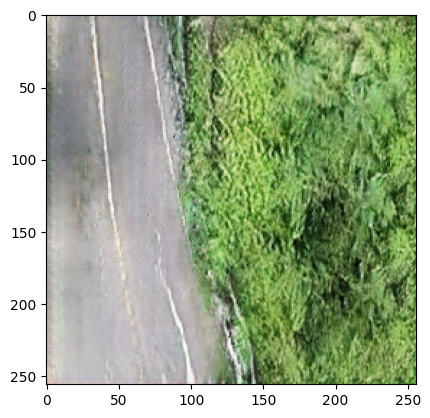

In [15]:
import matplotlib.pyplot as plt

# img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
img = plt.imread('./results/ROAD_pix2pix/test_latest/images/road_cloudy_90_30_final_0291_fake_B.png')
plt.imshow(img)

In [14]:
# img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
# plt.imshow(img)

In [15]:
# img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
# plt.imshow(img)